In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

G_PATH="C://Users//timna//OneDrive//Документы//Flat_Offers_Analysis//Result_Data//Data__08-06-2021__07-55.xlsx"


In [2]:
df=pd.read_excel(G_PATH)
df.head()

,id,Address,District,LAT,LON,Material,Price,Area,Price_per_msq,Rooms,Floor,Total_Floors
0,3504849974,"ул. Николая Ершова, стр. 65, Советский, Казань...",Советский,55.803190,49.181980,Монолит,5450000,38.9,140103,1,18,19
1,3442394647,"Республика Татарстан, Казань, проспект Альберт...",Советский,55.782948,49.191711,Монолит,4650000,35.2,132102,1,16,20
2,3305154690,"Республика Татарстан, Казань, проспект Ямашева...",Ново-Савиновский,55.824774,49.135187,Кирпич,7800000,70.1,111270,3,11,12
3,3475434775,"ул. Аделя Кутуя, д. 83а, Советский, Казань, Та...",Советский,55.784620,49.187360,Монолит,3484600,38.0,91700,1,20,20
4,2961859403,"ул. Родины, д. 9, Советский, Казань, Татарстан",Советский,55.763920,49.191080,Кирпич,6980000,56.0,124643,2,4,24


In [3]:
df.dtypes

id                 int64
Address           object
District          object
LAT              float64
LON              float64
Material          object
Price              int64
Area             float64
Price_per_msq      int64
Rooms             object
Floor              int64
Total_Floors       int64
dtype: object

Text(0, 0.5, '')

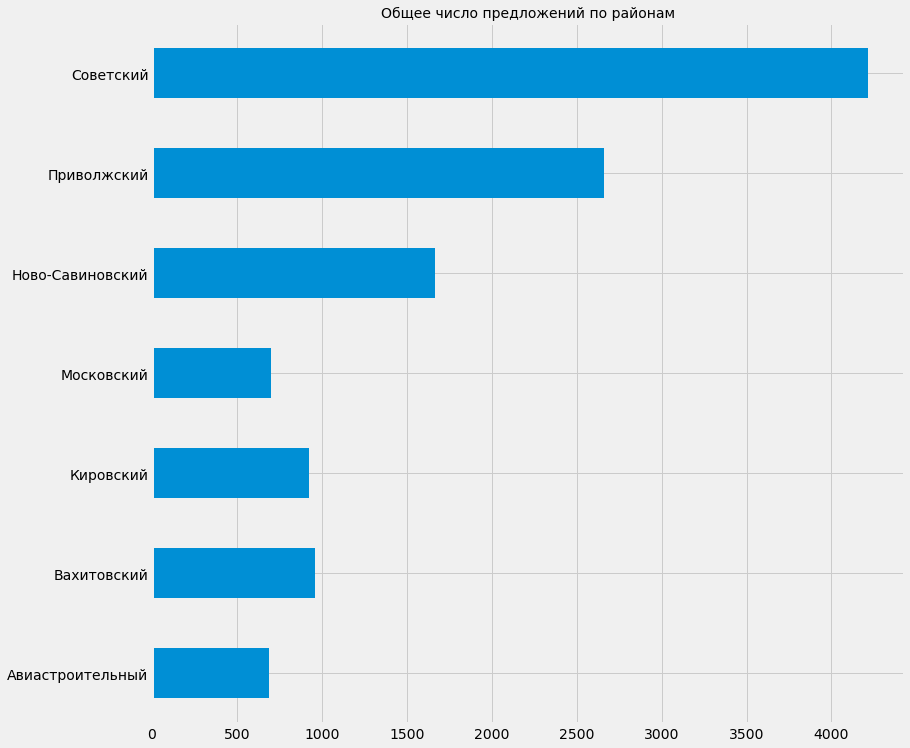

In [4]:
plt.style.use("fivethirtyeight")
df.groupby("District")["Address"].size().plot(kind='barh',figsize=(12,12),fontsize=14)
plt.title("Общее число предложений по районам",fontsize=14)
plt.ylabel("")

array([[<AxesSubplot:title={'center':'Авиастроительный'}>,
        <AxesSubplot:title={'center':'Вахитовский'}>,
        <AxesSubplot:title={'center':'Кировский'}>],
       [<AxesSubplot:title={'center':'Московский'}>,
        <AxesSubplot:title={'center':'Ново-Савиновский'}>,
        <AxesSubplot:title={'center':'Приволжский'}>],
       [<AxesSubplot:title={'center':'Советский'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

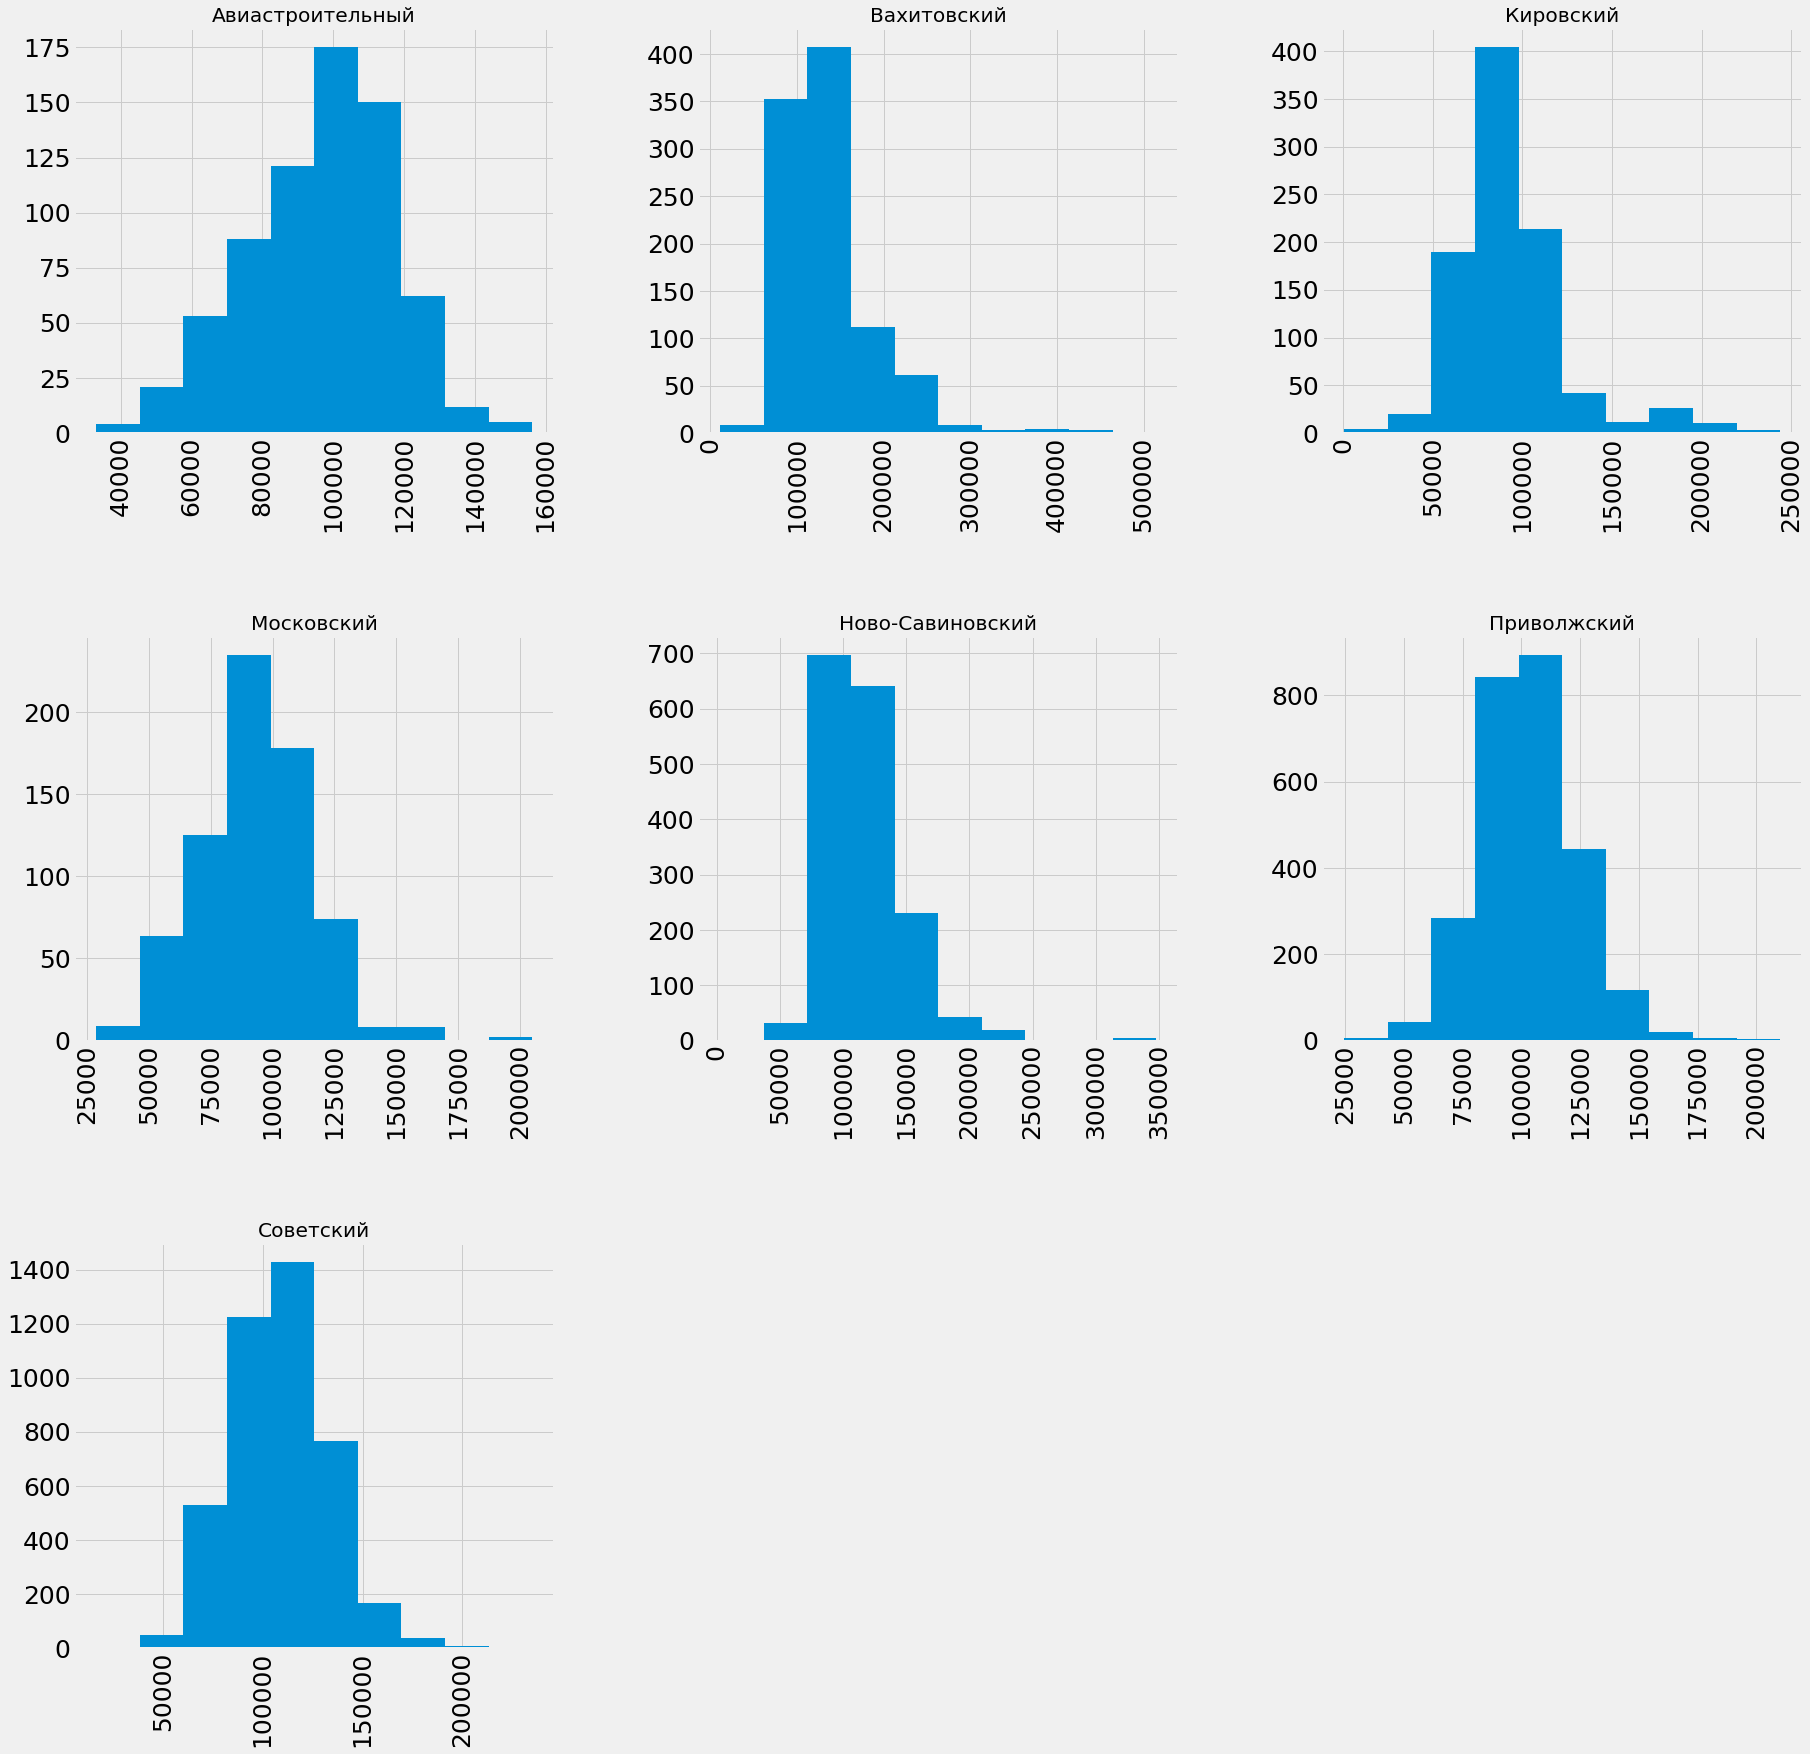

In [5]:
df.hist("Price_per_msq",by="District",figsize=(30,30),xlabelsize=25,ylabelsize=25)

Text(0.5, 0.98, '')

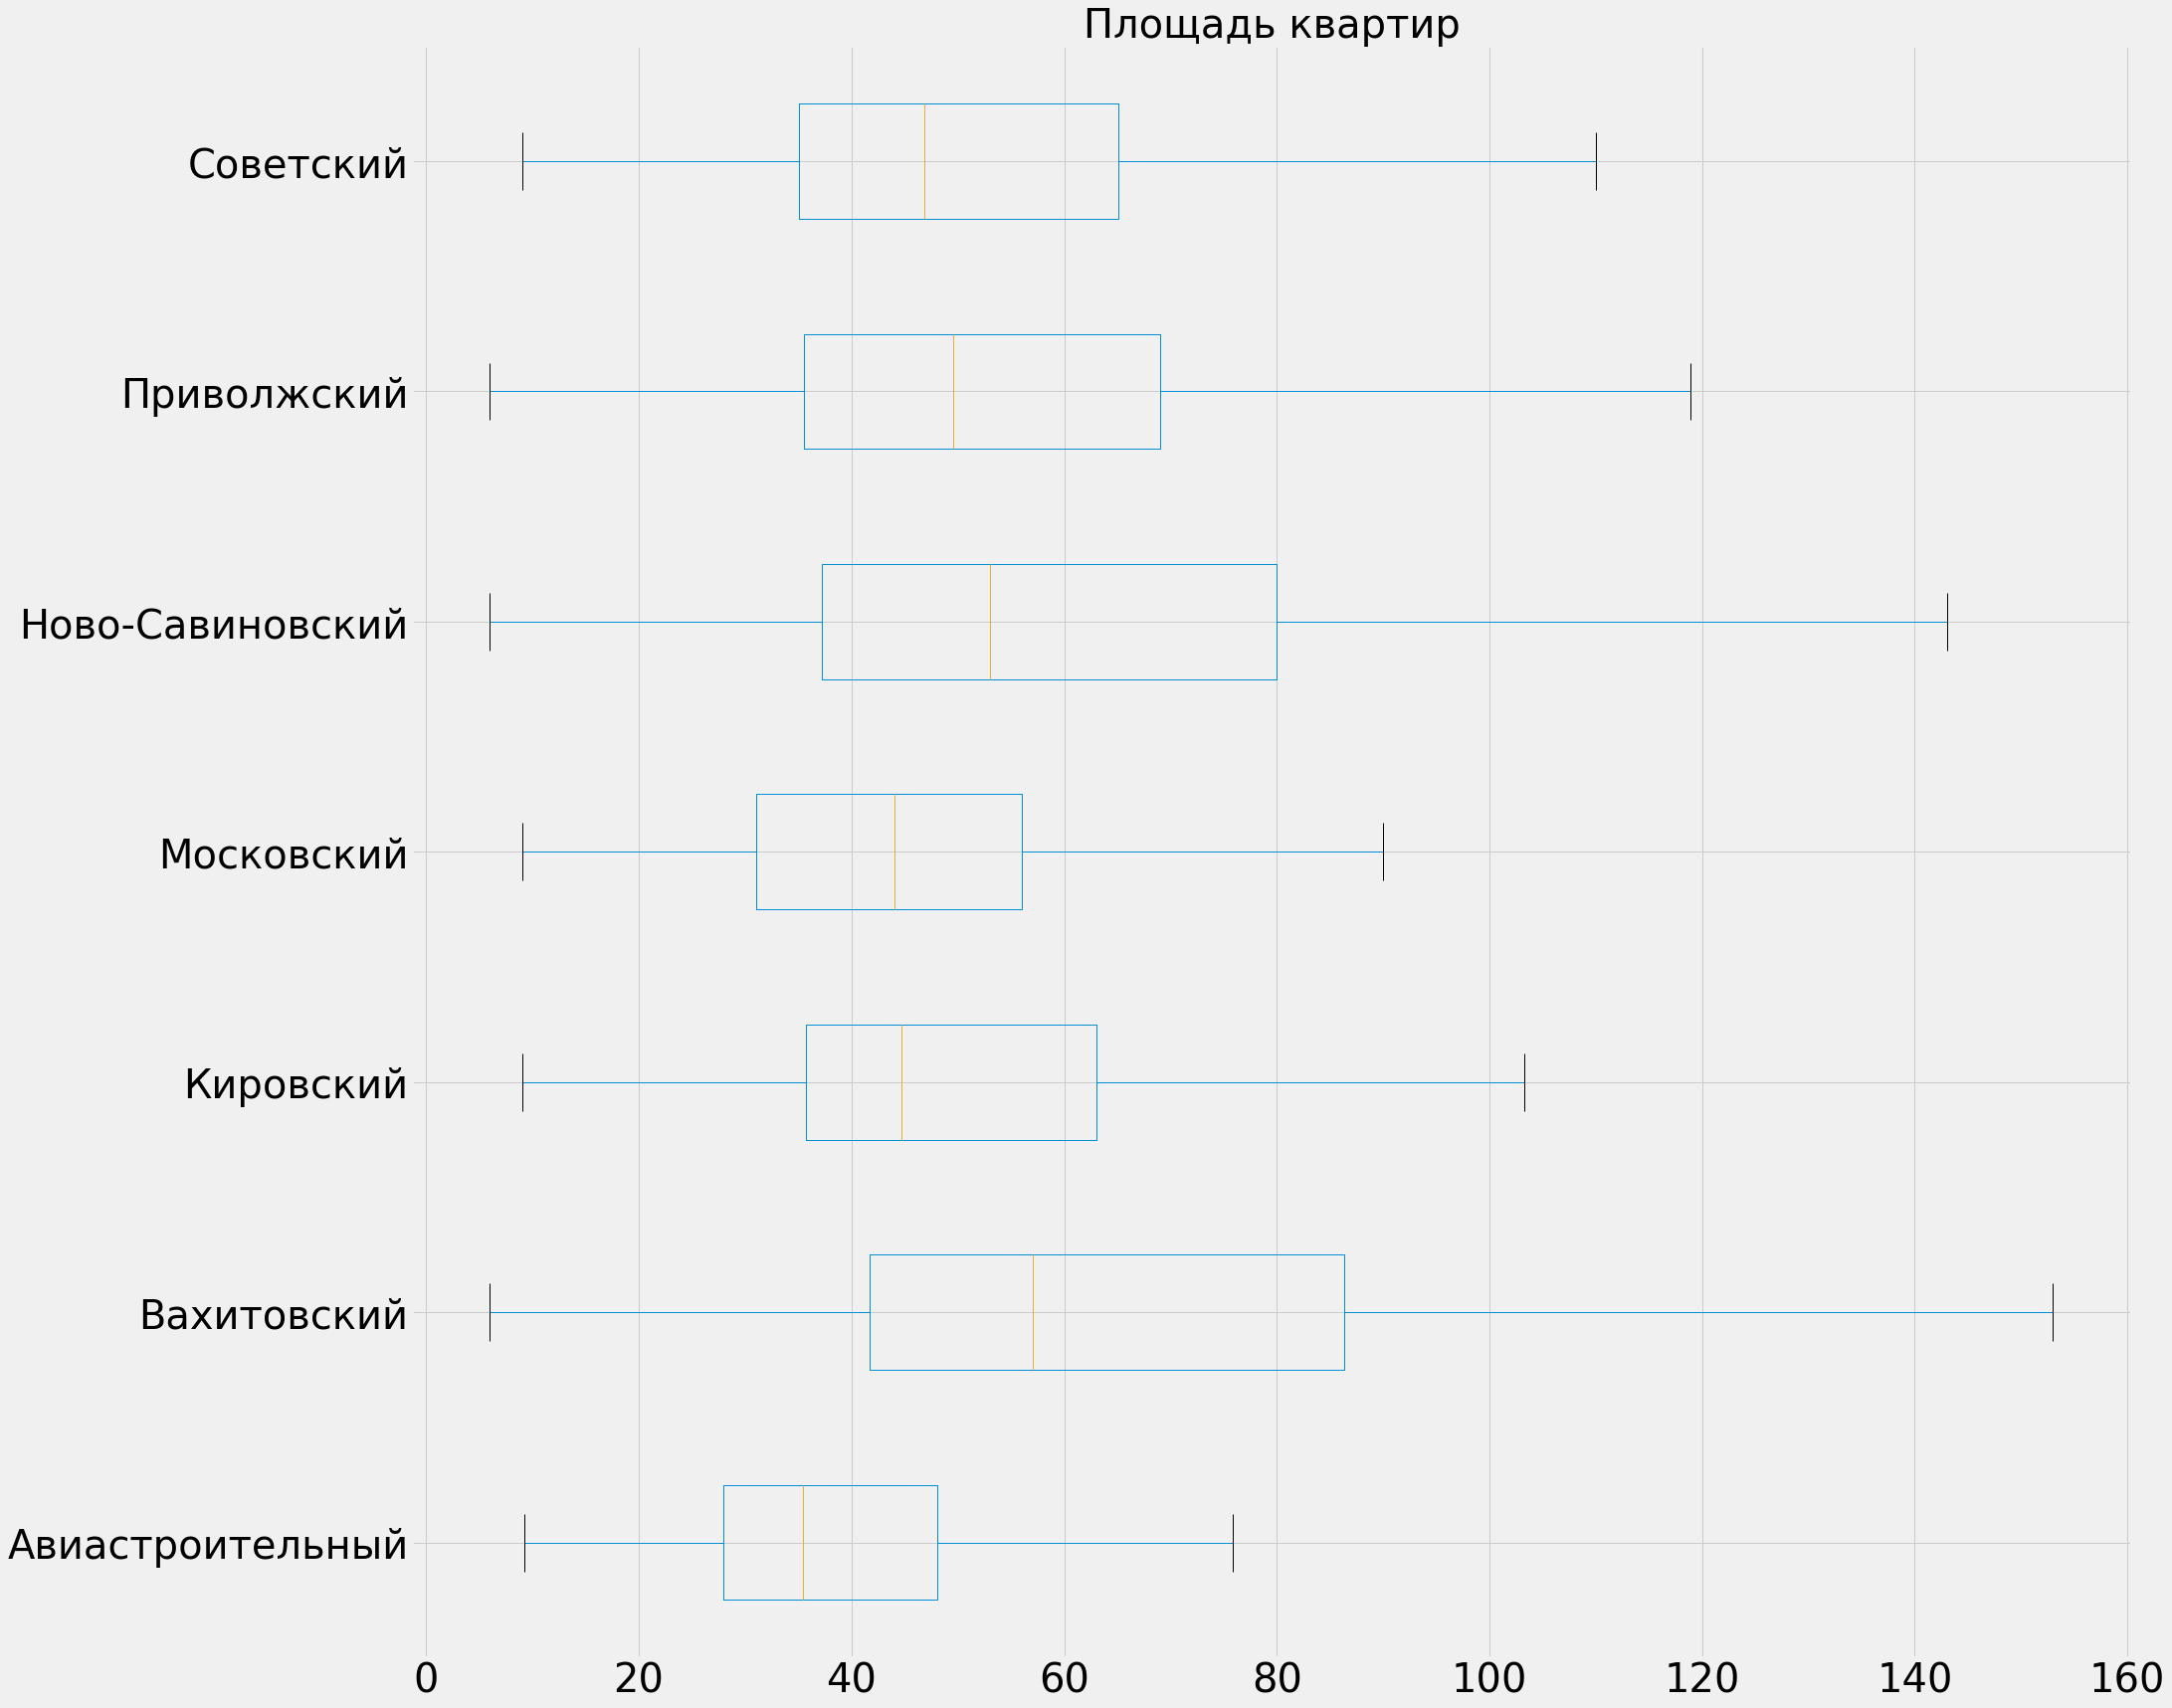

In [6]:
df.boxplot("Area",by="District",figsize=(30,30),fontsize=40,vert=False,showfliers=False)
plt.title("Площадь квартир",fontsize=40)
plt.xlabel("")
plt.suptitle("")

([], [])

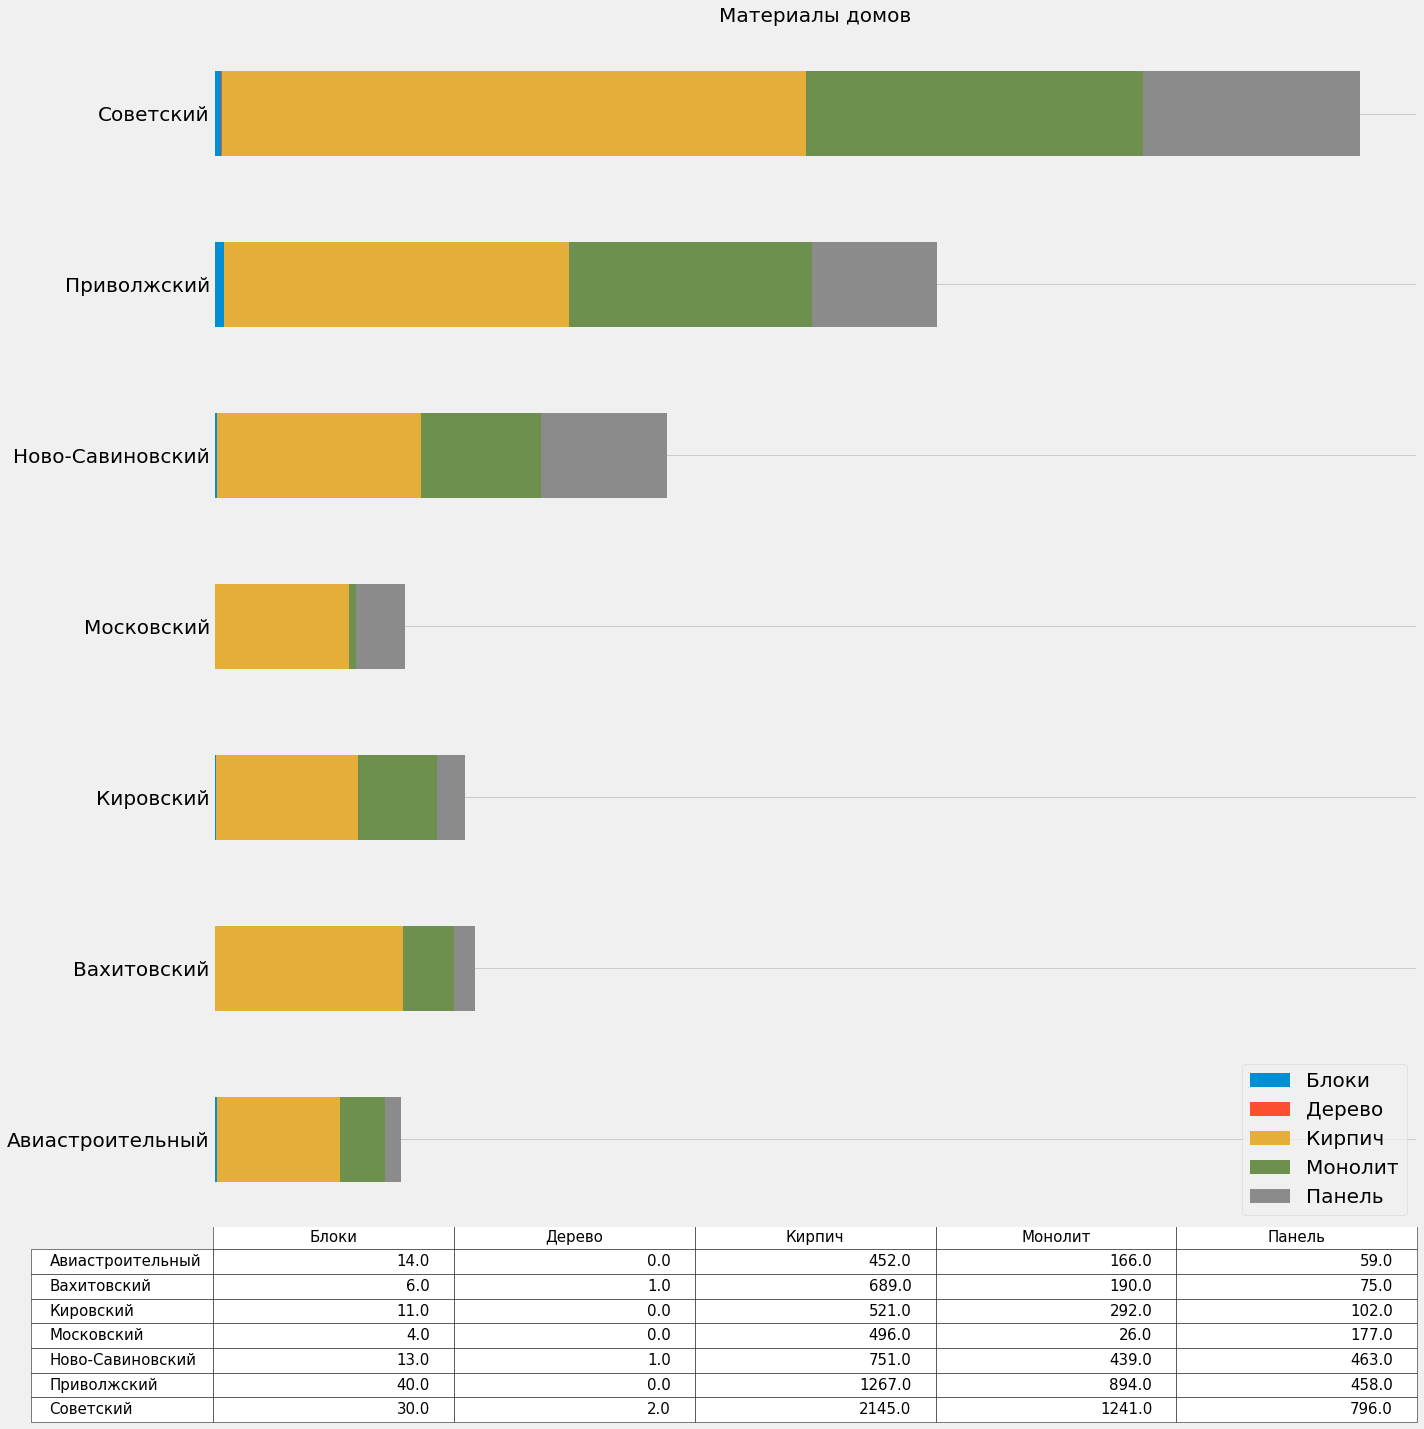

In [7]:
summary=df.groupby(["District","Material"]).size().unstack().fillna(0)
summary.plot.barh(stacked=True,figsize=(20,20),fontsize=20)
table=plt.table(cellText=summary.values,
         rowLabels=summary.index,
         colLabels=summary.columns,
        colWidths=[0.2]*5)
table.set_fontsize(15)
table.scale(1,2)
plt.ylabel('')
plt.title('Материалы домов',fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.xticks([])

In [8]:
df1=df.copy()

In [9]:
df1.Rooms.unique()

array(['1', '3', '2', 'Студия', '5', '4', 'Своб. планировка', '8', '> 9',
       '7'], dtype=object)

In [10]:
df1.loc[~df1["Rooms"].isin(["1","2","3","4","Студия","Своб. планировка"]),"Rooms"]='>4'

In [11]:
df1.loc[~df1["Rooms"].isin(["1","2","3","4",">4"]),"Rooms"]='Студия или Своб.Планировка'

<AxesSubplot:xlabel='Rooms', ylabel='District'>

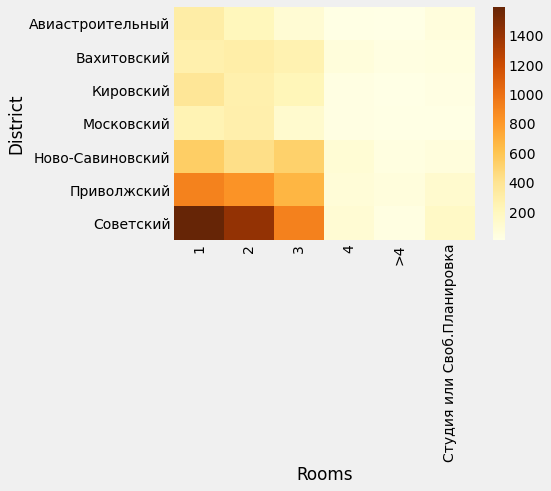

In [12]:
df_heatmap=df1[["District","Rooms"]].groupby(["District","Rooms"]).size().unstack().fillna(0)
sns.heatmap(df_heatmap,cmap='YlOrBr')